In [1]:
from google.colab import files
uploaded = files.upload()

Saving Meta Platforms Stock Price History.csv to Meta Platforms Stock Price History.csv


Mean Squared Error: 4053.29
R-squared: -4.69


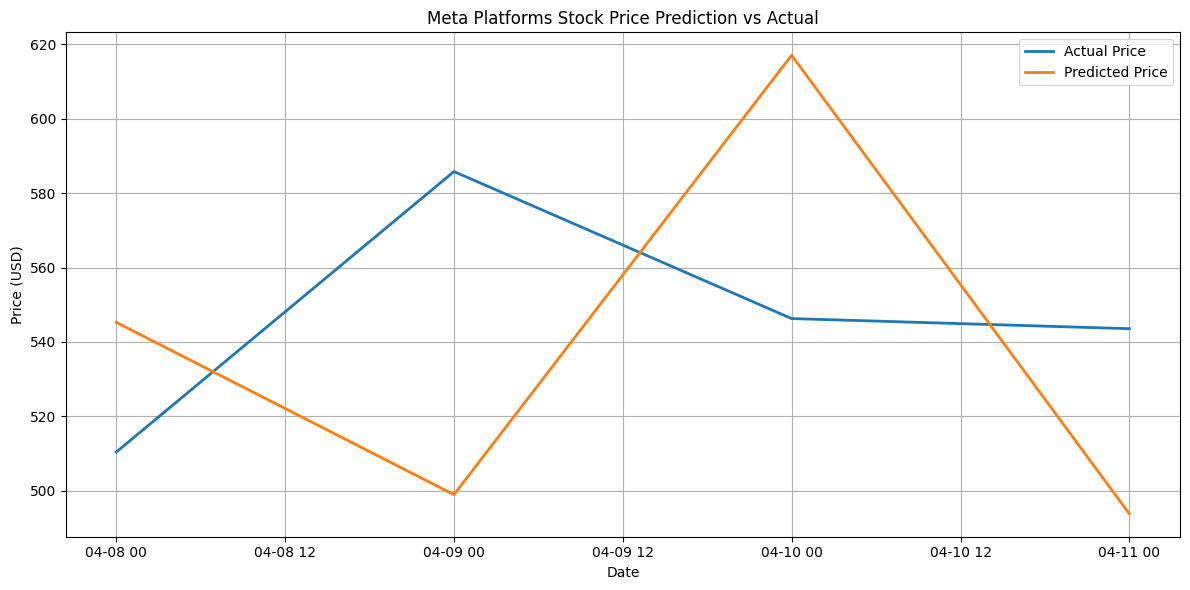

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load data
try:
    df = pd.read_csv("Meta Platforms Stock Price History.csv")
except FileNotFoundError:
    print("File not found. Make sure the CSV file is in the correct directory.")
    exit()

# Preprocess
df = df.rename(columns=lambda x: x.strip())
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df = df.sort_values('Date')

# Parse numeric fields
df['Close'] = pd.to_numeric(df['Price'].replace({',': ''}, regex=True), errors='coerce')
df['Vol.'] = df['Vol.'].str.replace('M', '').str.replace(',', '')
df['Vol.'] = pd.to_numeric(df['Vol.'], errors='coerce') * 1_000_000
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

df = df.dropna(subset=['Close'])

# Create lag features
n = 5
for i in range(1, n + 1):
    df[f'Close_Lag_{i}'] = df['Close'].shift(i)

df.dropna(inplace=True)

# Features and labels
X = df[[f'Close_Lag_{i}' for i in range(1, n + 1)]]
y = df['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test.values, label="Actual Price", linewidth=2)
plt.plot(df['Date'].iloc[-len(y_test):], predictions, label="Predicted Price", linewidth=2)
plt.legend()
plt.title("Meta Platforms Stock Price Prediction vs Actual")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()
